In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
dataset = pd.read_csv("income_regression_dataset3.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Occupation             10000 non-null  object 
 3   PAN_Card               10000 non-null  object 
 4   Aadhar_Card            10000 non-null  object 
 5   Bank_Account_No        10000 non-null  object 
 6   Marital_Status         10000 non-null  object 
 7   Children (Yes/No)      10000 non-null  object 
 8   Reported_Income        10000 non-null  int64  
 9   Interest_Income        9950 non-null   float64
 10  Business_Income        9950 non-null   float64
 11  Capital_Gains          9950 non-null   float64
 12  Other_Income           9950 non-null   float64
 13  Educational_Expenses   9950 non-null   float64
 14  Healthcare_Costs       9950 non-null   float64
 15  Lif

In [7]:
# Step 1: Check for missing values
missing_values = dataset.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Name                      0
Age                       0
Occupation                0
PAN_Card                  0
Aadhar_Card               0
Bank_Account_No           0
Marital_Status            0
Children (Yes/No)         0
Reported_Income           0
Interest_Income          50
Business_Income          50
Capital_Gains            50
Other_Income             50
Educational_Expenses     50
Healthcare_Costs         50
Lifestyle_Expenditure    50
Other_Expenses           50
Bank_Debited             50
Credit_Card_Debited      50
Actual_Income             0
dtype: int64


In [9]:
dataset.head()

,Name,Age,Occupation,PAN_Card,Aadhar_Card,Bank_Account_No,Marital_Status,Children (Yes/No),Reported_Income,Interest_Income,Business_Income,Capital_Gains,Other_Income,Educational_Expenses,Healthcare_Costs,Lifestyle_Expenditure,Other_Expenses,Bank_Debited,Credit_Card_Debited,Actual_Income
0,Name0001,56,Salaried,PAN0001X,Aadhar0001,BankAcc0001,Single,Yes,1595865,0.0,319173.0,79793.0,239380.0,127669.0,111711.0,191504.0,159586.0,79793.0,0.0,2563948
1,Name0002,23,Business,PAN0002X,Aadhar0002,BankAcc0002,Married,No,1837136,183714.0,367427.0,0.0,275570.0,146971.0,128600.0,0.0,183714.0,91857.0,55114.0,2057591
2,Name0003,39,Self-employed,PAN0003X,Aadhar0003,BankAcc0003,Single,No,1448397,144840.0,289679.0,0.0,NaN,115872.0,101388.0,0.0,144840.0,72420.0,43452.0,2000000
3,Name0004,70,Business,PAN0004X,Aadhar0004,BankAcc0004,Single,No,896310,89631.0,179262.0,0.0,134446.0,71705.0,0.0,0.0,0.0,44816.0,26889.0,2156239
4,Name0005,58,Self-employed,PAN0005X,Aadhar0005,BankAcc0005,Married,Yes,837210,83721.0,167442.0,0.0,125582.0,66977.0,58605.0,100465.0,83721.0,41860.0,25116.0,837211


In [11]:
# Step 2: Check for outliers using statistical methods
# Use the IQR (Interquartile Range) method

def detect_outliers(data, features):
    outlier_indices = []

    for feature in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[feature], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[feature], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Identify outliers
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Assuming 'dataset' is your DataFrame and the following are your numerical features
numerical_features = ["Age", "Reported_Income", "Interest_Income", "Business_Income", "Capital_Gains",
                      "Other_Income", "Educational_Expenses", "Healthcare_Costs", "Lifestyle_Expenditure",
                      "Other_Expenses", "Bank_Debited", "Credit_Card_Debited", "Actual_Income"]

outlier_indices = detect_outliers(dataset, numerical_features)

print("\nOutlier Indices:")
print(outlier_indices)

# Drop outliers from the dataset
dataset = dataset.drop(outlier_indices).reset_index(drop=True)
print("\nDataset after removing outliers:")
print(dataset.shape)



Outlier Indices:
[515, 522, 908, 6926, 9614, 4625, 402, 531, 534, 410, 1953, 548, 6182, 9766, 550, 425, 554, 2349, 429, 558, 6706, 4151, 3386, 442, 443, 571, 9278, 574, 5315, 5574, 9670, 3913, 3274, 4809, 457, 460, 9681, 1362, 6359, 217, 474, 8411, 7900, 482, 9072, 115, 505]

Dataset after removing outliers:
(9953, 20)


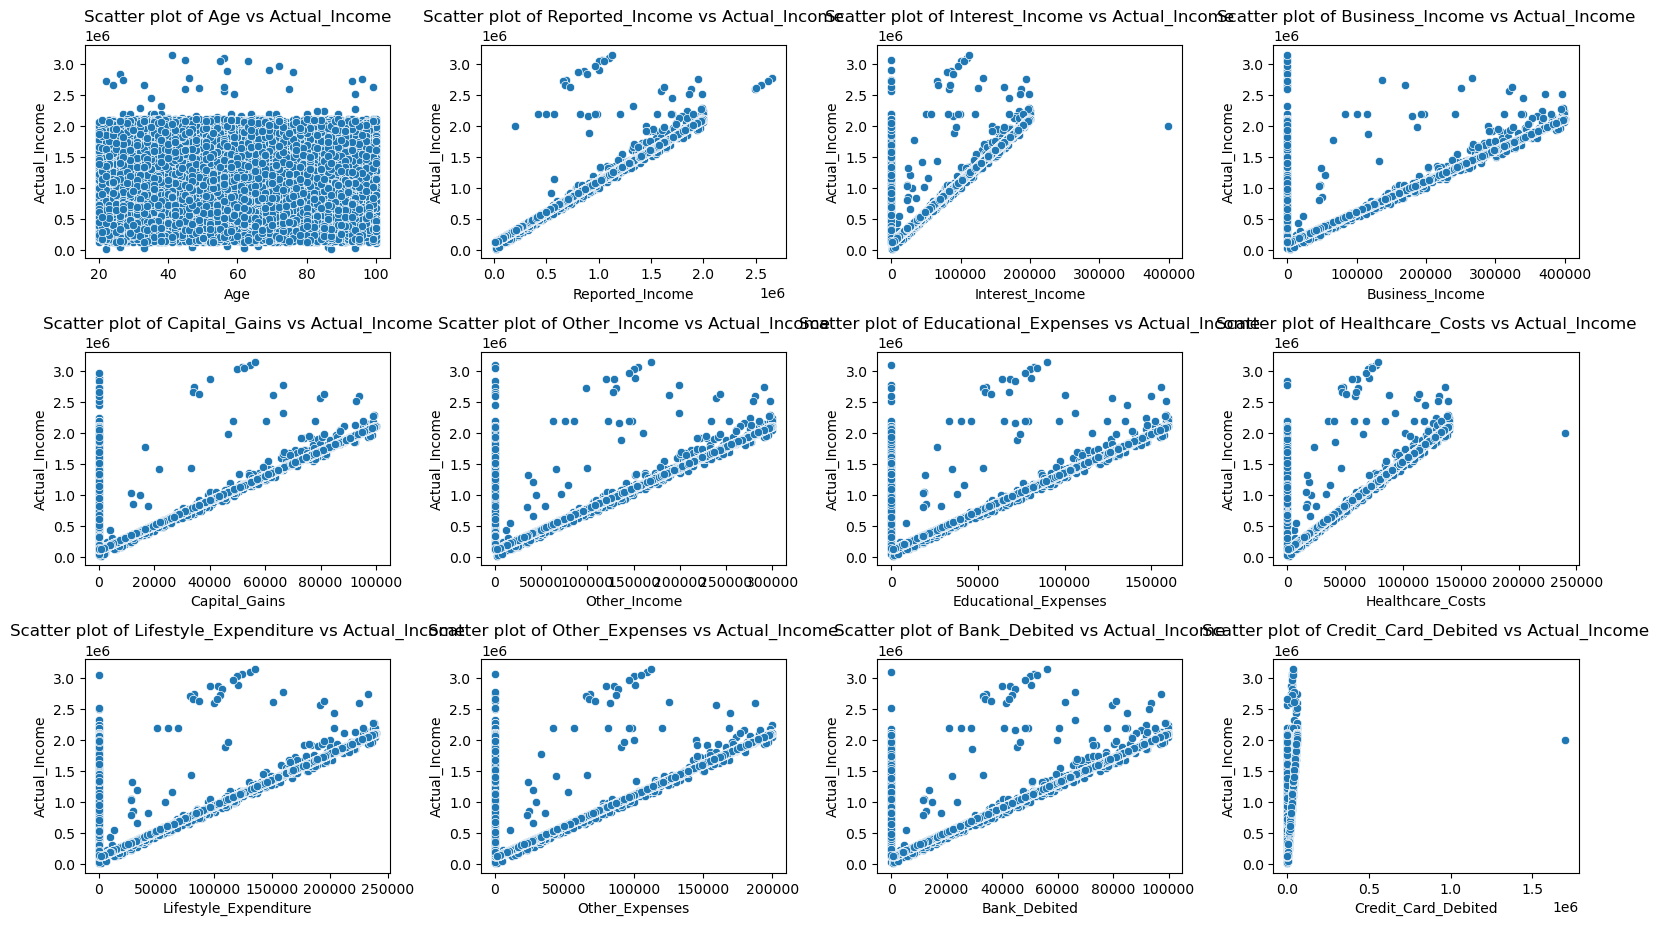

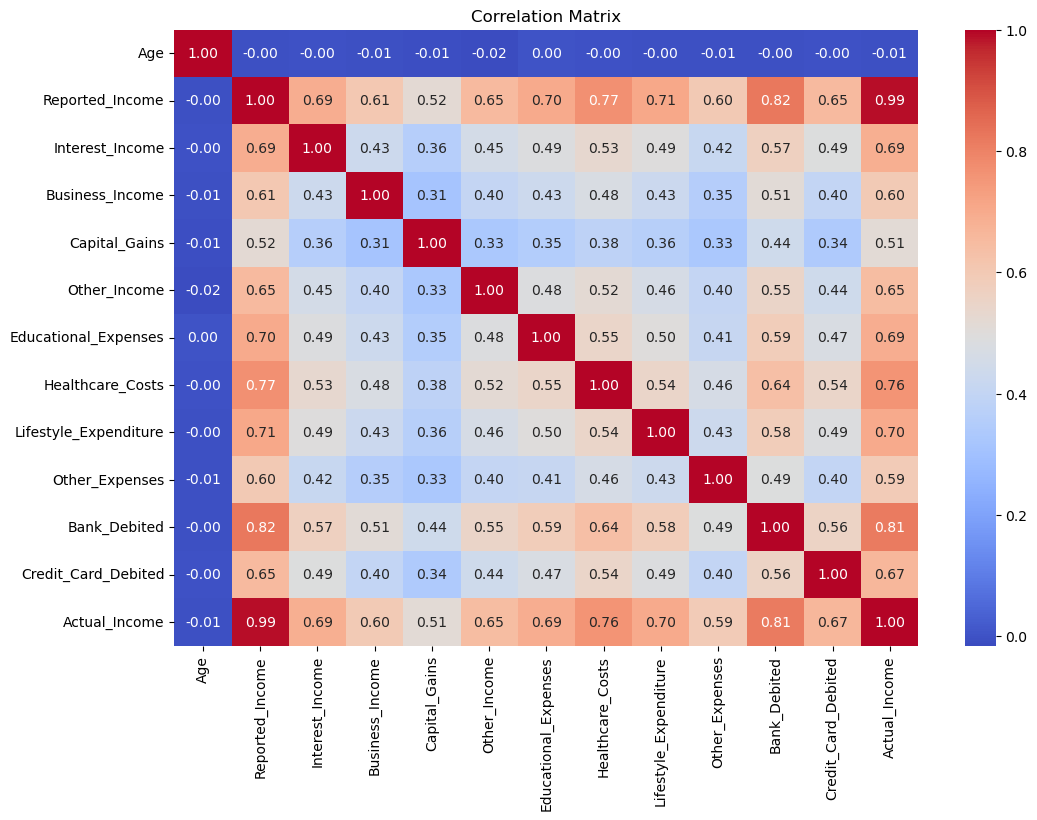

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Exploratory Data Analysis (EDA)

# Scatter plots for numerical features against the target variable
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=feature, y='Actual_Income', data=dataset)
    plt.title(f'Scatter plot of {feature} vs Actual_Income')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = dataset[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create and save label encoders for each categorical column
label_encoder_occupation = LabelEncoder()
label_encoder_children = LabelEncoder()
label_encoder_marital_status = LabelEncoder()

# Fit and transform each categorical column
dataset['Occupation'] = label_encoder_occupation.fit_transform(dataset['Occupation'])
dataset['Children (Yes/No)'] = label_encoder_children.fit_transform(dataset['Children (Yes/No)'])
dataset['Marital_Status'] = label_encoder_marital_status.fit_transform(dataset['Marital_Status'])

# Save the label encoders
joblib.dump(label_encoder_occupation, 'label_encoder_occupation.joblib')
joblib.dump(label_encoder_children, 'label_encoder_children.joblib')
joblib.dump(label_encoder_marital_status, 'label_encoder_marital_status.joblib')


['label_encoder_marital_status.joblib']

In [15]:
# Drop rows with NaN values
dataset = dataset.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", dataset.shape)

Shape of the cleaned DataFrame: (9468, 20)


In [16]:
# Define features and target variable
X = dataset.drop(['Actual_Income', 'Name', 'PAN_Card', 'Aadhar_Card', 'Bank_Account_No'], axis=1)
y = dataset['Actual_Income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X.head()

,Age,Occupation,Marital_Status,Children (Yes/No),Reported_Income,Interest_Income,Business_Income,Capital_Gains,Other_Income,Educational_Expenses,Healthcare_Costs,Lifestyle_Expenditure,Other_Expenses,Bank_Debited,Credit_Card_Debited
0,56,1,1,1,1595865,0.0,319173.0,79793.0,239380.0,127669.0,111711.0,191504.0,159586.0,79793.0,0.0
1,23,0,0,0,1837136,183714.0,367427.0,0.0,275570.0,146971.0,128600.0,0.0,183714.0,91857.0,55114.0
3,70,0,1,0,896310,89631.0,179262.0,0.0,134446.0,71705.0,0.0,0.0,0.0,44816.0,26889.0
4,58,2,0,1,837210,83721.0,167442.0,0.0,125582.0,66977.0,58605.0,100465.0,83721.0,41860.0,25116.0
5,62,0,1,1,24368,2437.0,0.0,1218.0,3655.0,1949.0,1706.0,0.0,2437.0,0.0,731.0


In [18]:
# Decision Trees
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = r2_score(y_test, tree_pred)
print(f"Decision Trees Accuracy: {tree_accuracy:.4f}")

Decision Trees Accuracy: 0.9606


In [19]:
# Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = r2_score(y_test, forest_pred)
print(f"Random Forest Accuracy: {forest_accuracy:.4f}")

Random Forest Accuracy: 0.9679


In [20]:
# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = r2_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.0046


In [22]:
# k-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = r2_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9703


In [28]:
# Gradient Boosting (XGBoost)
xgb_model = GradientBoostingRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = r2_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9709


In [29]:
import matplotlib.pyplot as plt



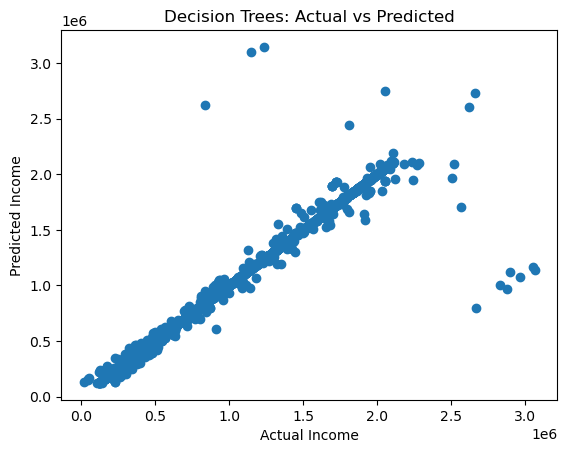

In [30]:
# Scatter plot for Decision Trees
plt.scatter(y_test, tree_pred)
plt.title('Decision Trees: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

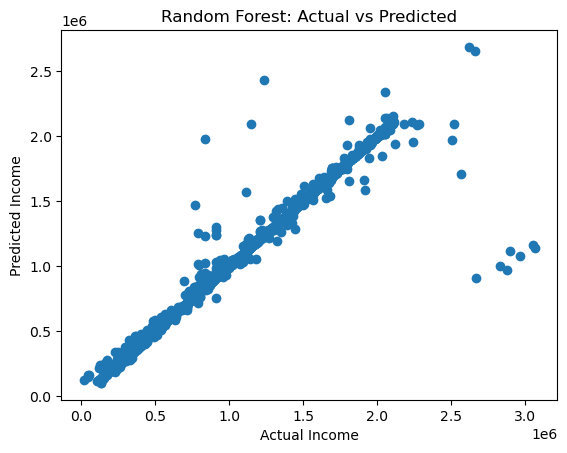

In [31]:
# Scatter plot for Random Forest
plt.scatter(y_test, forest_pred)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

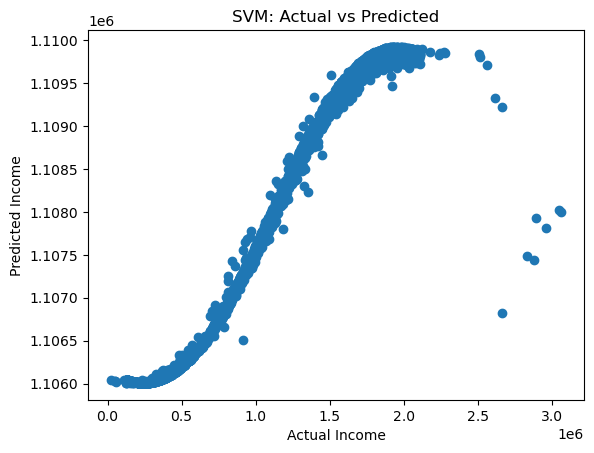

In [33]:
# Scatter plot for SVM
plt.scatter(y_test, svm_pred)
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

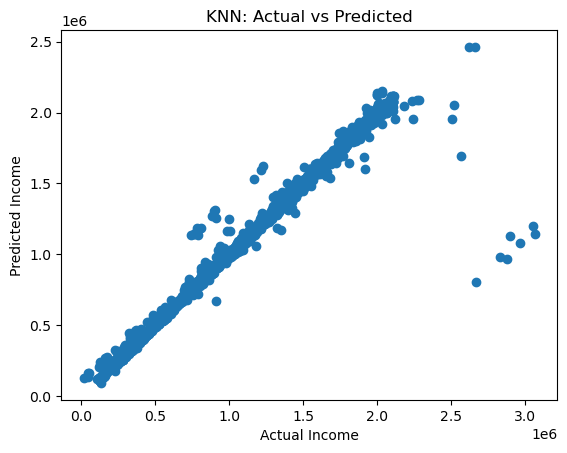

In [34]:
# Scatter plot for k-Nearest Neighbors (KNN)
plt.scatter(y_test, knn_pred)
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

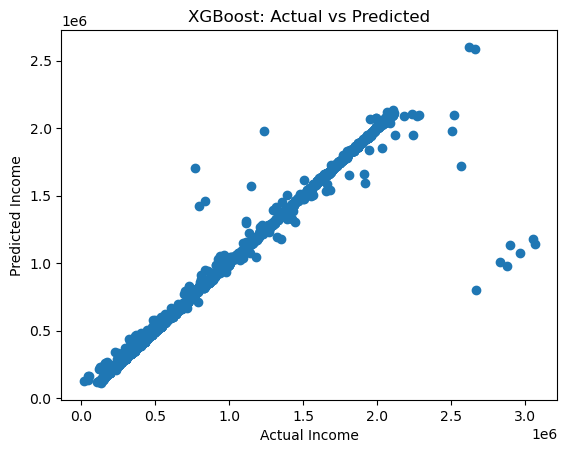

In [35]:
# Scatter plot for Gradient Boosting (XGBoost)
plt.scatter(y_test, xgb_pred)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

In [36]:
# Create a dictionary to store model accuracies
model_accuracies = {
    'Random Forest': forest_accuracy,
    'Decision Trees': tree_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Gradient Boosting': xgb_accuracy
}

# Find the best model
best_model = max(model_accuracies, key=model_accuracies.get)

# Print the best model and its accuracy
print(f"Best Model: {best_model}")
print(f"Accuracy of the Best Model: {model_accuracies[best_model]:.4f}")

Best Model: Gradient Boosting
Accuracy of the Best Model: 0.9709


In [39]:
from joblib import dump  # For scikit-learn version 0.24 or newer

In [40]:
# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = None

if best_model_name == 'Decision Trees':
    best_model = tree_model
elif best_model_name == 'Random Forest':
    best_model = forest_model
elif best_model_name == 'SVM':
    best_model = svm_model
elif best_model_name == 'KNN':
    best_model = knn_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model

# Save the best model as a file
import joblib

best_model_filename = 'best_model.joblib'
joblib.dump(best_model, best_model_filename)

print(f"The best performing model is {best_model_name}.")
print(f"The model has been saved as {best_model_filename}.")


The best performing model is Gradient Boosting.
The model has been saved as best_model.joblib.


In [41]:
# Save the feature order to a file
feature_order_filename = 'feature_order.txt'
with open(feature_order_filename, 'w') as file:
    file.write(','.join(X.columns))

print(f"Feature order has been saved to {feature_order_filename}.")


Feature order has been saved to feature_order.txt.


In [43]:
# Read the feature order from the file
with open('feature_order.txt', 'r') as file:
    feature_order = [line.strip() for line in file]

print("Feature order read from file:")
print(feature_order)


Feature order read from file:
['Age,Occupation,Marital_Status,Children (Yes/No),Reported_Income,Interest_Income,Business_Income,Capital_Gains,Other_Income,Educational_Expenses,Healthcare_Costs,Lifestyle_Expenditure,Other_Expenses,Bank_Debited,Credit_Card_Debited']


In [47]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = None

if best_model_name == 'Decision Trees':
    best_model = tree_model
elif best_model_name == 'Random Forest':
    best_model = forest_model
elif best_model_name == 'SVM':
    best_model = svm_model
elif best_model_name == 'KNN':
    best_model = knn_model
elif best_model_name == 'Gradient Boosting':
    best_model = xgb_model

# Save the best model as a file
best_model_filename = 'best_model.joblib'
joblib.dump(best_model, best_model_filename)

print(f"The best performing model is {best_model_name}.")
print(f"The model has been saved as {best_model_filename}.")

# Load the saved model
loaded_model = joblib.load(best_model_filename)  # Update with the actual filename

# Make predictions on the test data
test_predictions = loaded_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"R-squared on Test Set: {r2:.4f}")

The best performing model is Gradient Boosting.
The model has been saved as best_model.joblib.
Mean Squared Error on Test Set: 10272835033.5404
R-squared on Test Set: 0.9709
